<a href="https://colab.research.google.com/github/jasxn808/Basic-Python-Analysis-NFL-Stats/blob/main/QB_EPA_3year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nfl_data_py

In [5]:
import pandas as pd
import nfl_data_py as nfl
from matplotlib import pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
seasons = range(2020, 2022+1)

#['epa']
df = nfl.import_pbp_data(seasons)

2020 done.
2021 done.
2022 done.
Downcasting floats.


In [14]:

df_pass = \
  df.query('passer_id.notnull() & play_type == "pass"')[['passer_id', 'passer_player_name', 'epa', 'season']]



df_agg = \
  df_pass\
    .groupby(['passer_id', 'passer_player_name', 'season'])\
    .agg({'epa':['mean', 'count']})



df_agg.columns = list(map('_'.join, df_agg.columns))

df_agg.reset_index(inplace=True)

df_agg.rename(columns={'epa_count':'n'}, inplace=True)

df_agg = \
  df_agg.query('n > 100')

# df_agg['numb_seasons'] = \
#   df_agg.sort_values('season', ascending=True)\
#   .groupby(['passer_id','passer_player_name'])\
#   .cumcount() + 1



In [97]:
df_agg_filter = \
df_agg\
  .groupby(['passer_id', 'passer_player_name'])\
  .filter(lambda x: len(x) > 2)


df_2020 = \
  df_agg_filter.query('season == 2020')

df_2021 = \
  df_agg_filter.query('season == 2021')

df_2022 = \
  df_agg_filter.query('season == 2022')


# qbs=[]
# for qb in df_agg_filter['passer_player_name']:
#   qbs.append(qb)

# epa=[]
# epa.append(df_agg_filter['epa_mean'])

pd.set_option('display.max_rows', None)


24


Text(0, 0.5, 'QB EPA')

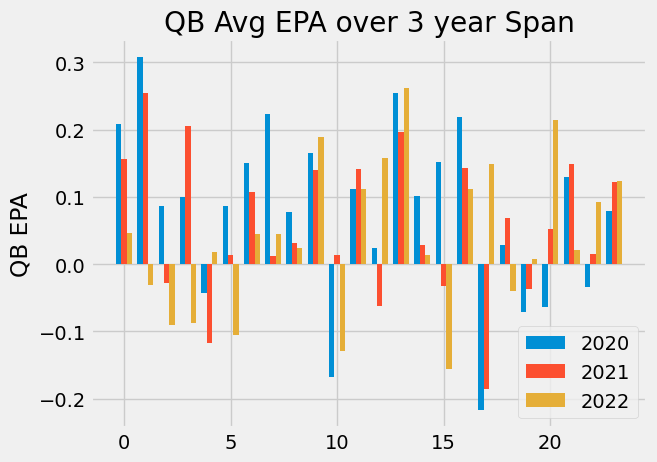

In [108]:
plt.style.use('fivethirtyeight')
width = 0.25

x_indexes = np.arange(len(df_2020))


plt.bar(x_indexes - width, df_2020['epa_mean'], width=width, label='2020')
plt.bar(x_indexes, df_2021['epa_mean'], width=width, label='2021')
plt.bar(x_indexes + width, df_2022['epa_mean'], width=width, label='2022')

plt.legend()
plt.title('QB Avg EPA over 3 year Span')
plt.ylabel('QB EPA')
#plt.xticks(ticks=x_indexes, labels=df_2020['passer_player_name'])
